In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Wind direction | (deg)', ylabel='System power generated | (kW)'>

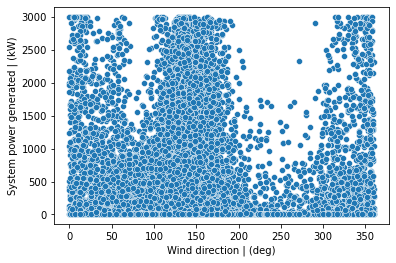

In [4]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
coviddata = "/Users/rmurarishetti/Documents/MU_Term 3/TexasTurbine.csv"
df_covid = pd.read_csv(coviddata)

sns.scatterplot(y= df_covid['System power generated | (kW)'] ,x =df_covid['Wind direction | (deg)'])

In [5]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
EVdata = "/Users/rmurarishetti/Documents/MU_Term 3/Cheapestelectriccars-EVDatabase.csv"
df_ev = pd.read_csv(EVdata)
rowselector = (df_ev["PriceinUSD"]>=25000)&(df_ev["PriceinUSD"]<=70000)
df_2 = df_ev.loc[rowselector, :]
df_2


,Name,Subtitle,Acceleration(sec),TopSpeed(km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinUSD
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3,150,335,173,210,Front Wheel Drive,5,"42,990",NaN,49008.60
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4,130,160,194,32,Front Wheel Drive,5,NaN,"31,680",42768.00
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9,144,220,164,230,Front Wheel Drive,5,"29,990","25,995",34188.60
5,Nissan e-NV200 Evalia,Battery Electric Vehicle | 36 kWh,14.0,123,165,218,170,Front Wheel Drive,7,"43,433","30,255",49513.62
6,Volkswagen ID.3 Pure Performance,Battery Electric Vehicle | 45 kWh,8.9,160,275,164,260,Rear Wheel Drive,5,"31,960","27,120",36434.40
...,...,...,...,...,...,...,...,...,...,...,...,...
172,MG Marvel R,Battery Electric Vehicle | 65 kWh,7.9,200,340,191,390,Rear Wheel Drive,5,"40,000",NaN,45600.00
173,Tesla Model 3 Long Range Dual Motor,Battery Electric Vehicle | 76 kWh,4.4,233,490,155,820,All Wheel Drive,5,"53,560",NaN,61058.40
174,MG MG5 EV Long Range,Battery Electric Vehicle | 57 kWh,7.7,185,340,168,340,Front Wheel Drive,5,NaN,"26,495",35768.25
175,Audi Q4 e-tron 45 quattro,Battery Electric Vehicle | 76.6 kWh,6.9,180,385,199,470,All Wheel Drive,5,"50,900",NaN,58026.00


In [6]:
def normalize_z(df):
    dfout = (df - df.mean(axis=0))/df.std(axis=0)
    return dfout
    pass

def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    feature = df_feature.to_numpy()
    ones = np.ones((df_feature.shape[0],1))
    X = np.concatenate((ones, feature), axis=1)
    return X
    pass

def prepare_target(df_target):
    return df_target.to_numpy()
    pass

def predict(df_feature, beta):
    dfout = normalize_z(df_feature)
    X = prepare_feature(dfout)
    return predict_norm(X, beta)
    pass

def predict_norm(X, beta):
    y = np.matmul(X, beta)
    return y
    pass

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    ymean = np.mean(y)
    sstot = np.sum((y-ymean)**2)
    ssres = np.sum((y-ypred)**2)

    r_2 = 1 - (ssres/sstot)
    return r_2
    pass

def mean_squared_error(target, pred):
    n = target.shape[0]
    return (1/n)*np.sum((target-pred)**2)
    pass

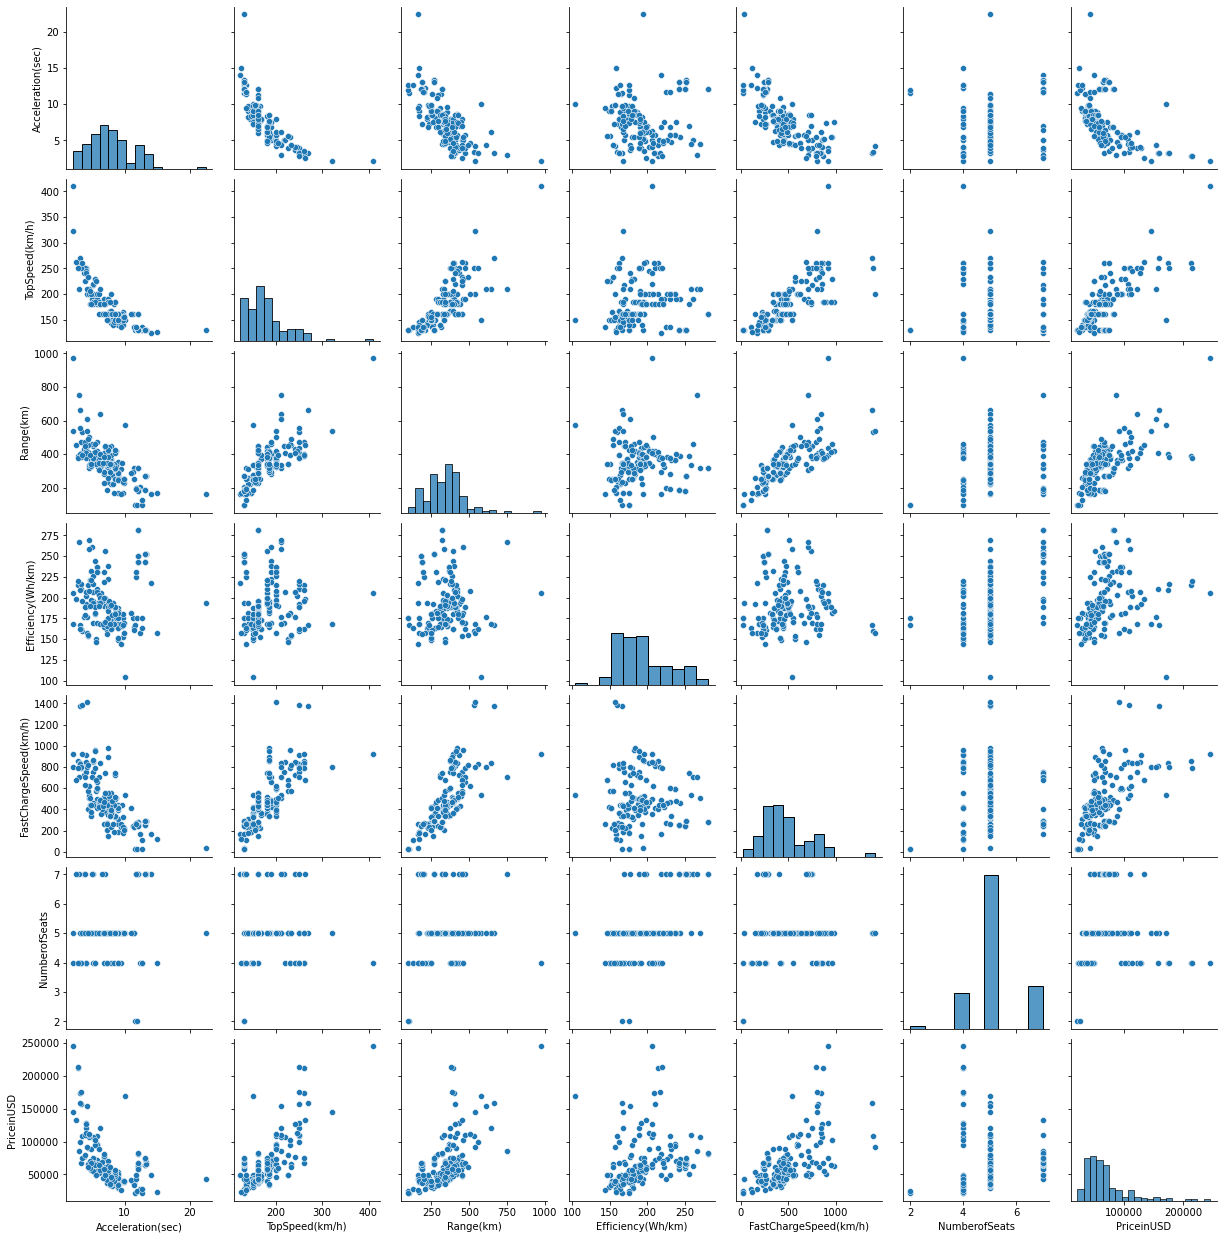

In [7]:
sns.pairplot(df_ev)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [9]:
def true_awd(input):
    if input == "All Wheel Drive":
        return 1
    else:
        return 0


In [10]:
# Read the CSV and extract the features
df_ev = pd.read_csv(EVdata)
df_ev
df_ev_copy = df_ev.copy()
df_ev_copy["Range^2(km^2)"] = df_ev["Range(km)"].apply(lambda x: x**2)
df_ev_copy["Drivetrain"] = df_ev["Drive"].apply(true_awd)
df_feature, df_target = get_features_targets(df_ev_copy, ["Acceleration(sec)", "TopSpeed(km/h)", "Range^2(km^2)", "Efficiency(Wh/km)", "FastChargeSpeed(km/h)", "NumberofSeats"], ["PriceinUSD"])
# normalize
df_feature = normalize_z(df_feature)

###
### YOUR CODE HERE
###


In [11]:
# Split the data into training and test data set using scikit-learn function
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)

# Instantiate LinearRegression() object
model = LinearRegression()
model.fit(df_feature_train, df_target_train)
# Call the fit() method
pass

###
### YOUR CODE HERE
###

print(model.coef_, model.intercept_)




[[ 9742.889821   25075.85927955  5675.62457547 10596.86110838
   8054.76636861 -3411.32401072]] [67751.99138172]


In [19]:
pred = model.predict(df_feature_test)
#plt.scatter(df_feature_test, df_target_test)
#plt.plot(df_feature_test, pred, color="orange")

print(df_feature_test)

     Acceleration(sec)  TopSpeed(km/h)  Range^2(km^2)  Efficiency(Wh/km)  \
1             4.612257       -1.116115      -1.022009          -0.018427   
133          -1.548903        1.731487       0.151323           0.774092   
134          -1.359329        1.968787       0.266138           0.042536   
7            -0.316671        0.070386       0.189101          -0.079390   
136          -1.011776        0.544986       1.243915           0.408314   
11            0.283647       -0.641515      -0.657565          -0.445168   
140          -0.537841        0.189036      -0.356084          -0.140353   
142          -0.822202        0.189036       0.114039          -0.018427   
15            0.030882       -0.238105       0.077249          -0.658538   
145          -0.759011        0.189036       0.385397          -0.170834   
146          -0.506245        0.782286       2.770580          -0.810945   
148          -0.695819        1.138237      -0.133121          -1.451057   
20          

In [13]:
r2 = r2_score(df_target_test, pred)
print(r2)


0.6966355510624869


["Acceleration(sec)", "TopSpeed(km/h)", "Range^2(km^2)", "Efficiency(Wh/km)", "FastChargeSpeed(km/h)", "NumberofSeats"]

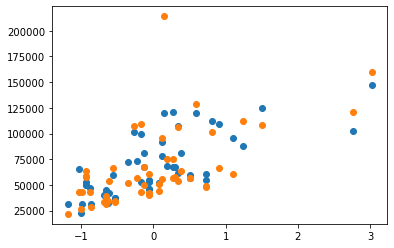

In [20]:
plt.scatter(df_feature_test["Range^2(km^2)"], pred)
plt.scatter(df_feature_test["Range^2(km^2)"], df_target_test)

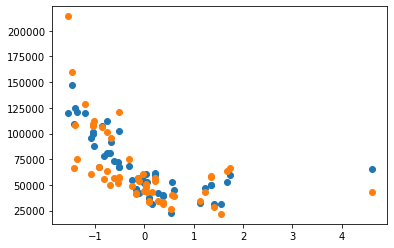

In [21]:
plt.scatter(df_feature_test["Acceleration(sec)"], pred)
plt.scatter(df_feature_test["Acceleration(sec)"], df_target_test)

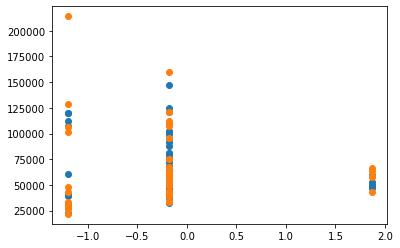

In [22]:
plt.scatter(df_feature_test["NumberofSeats"], pred)
plt.scatter(df_feature_test["NumberofSeats"], df_target_test)

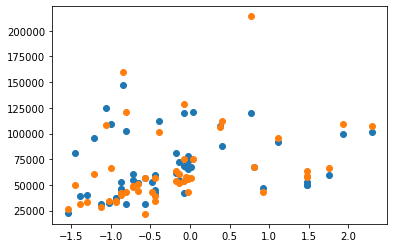

In [27]:
plt.scatter(df_feature_test["Efficiency(Wh/km)"], pred)
plt.scatter(df_feature_test["Efficiency(Wh/km)"], df_target_test)

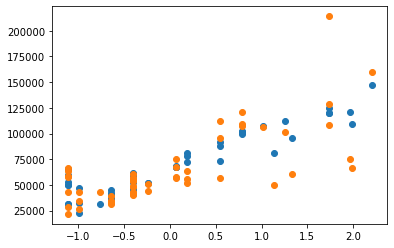

In [24]:
plt.scatter(df_feature_test["TopSpeed(km/h)"], pred)
plt.scatter(df_feature_test["TopSpeed(km/h)"], df_target_test)

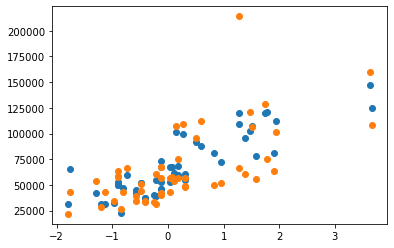

In [25]:
plt.scatter(df_feature_test["FastChargeSpeed(km/h)"], pred)
plt.scatter(df_feature_test["FastChargeSpeed(km/h)"], df_target_test)

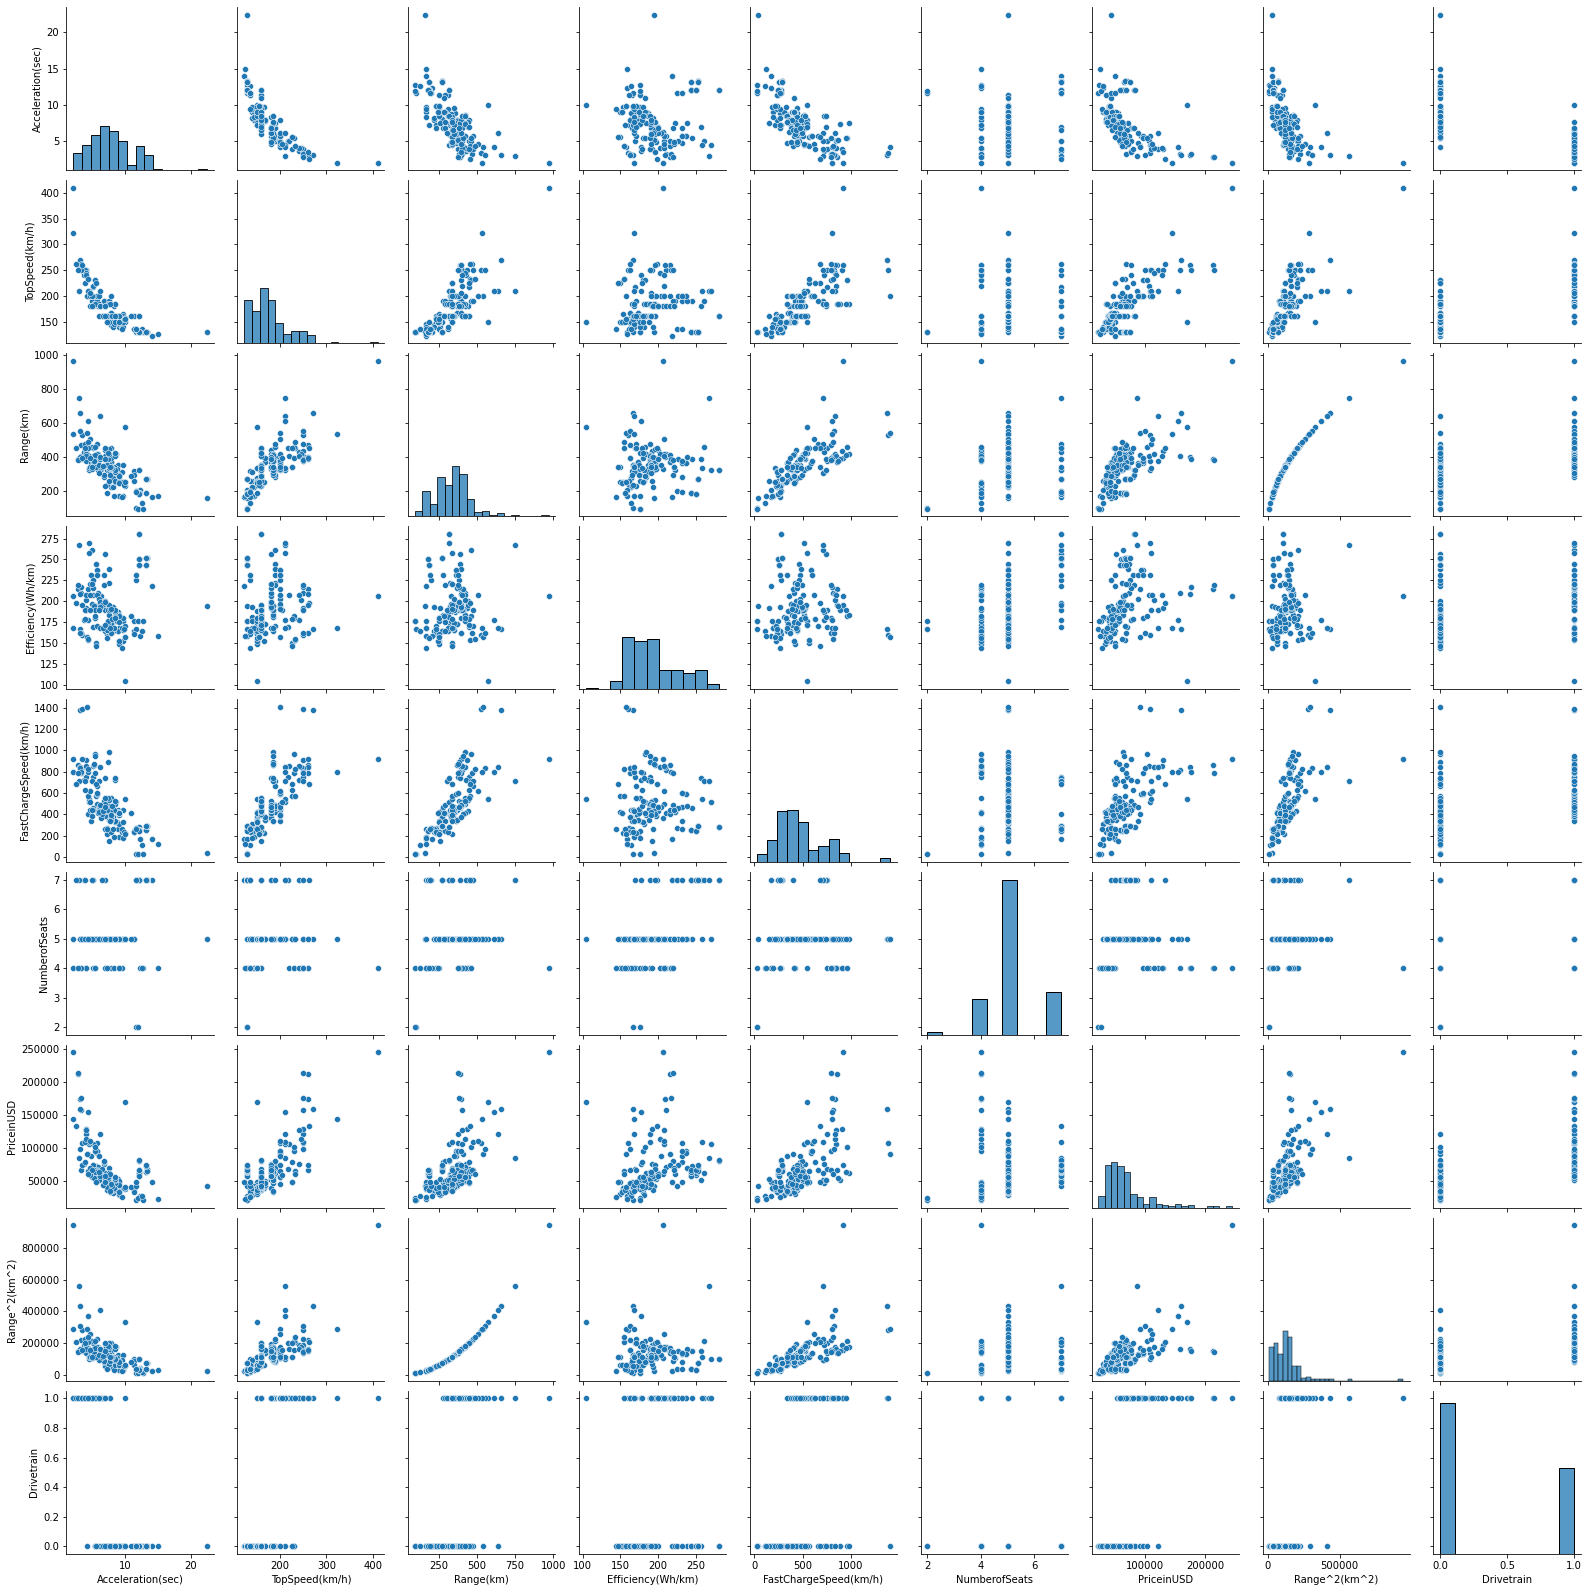

In [15]:
sns.pairplot(df_ev_copy)